In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df = pd.read_json('loan_data.json')
df

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    int64 
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit_History,511.0,0.843444,0.363738,0.0,1.0,1.0,1.0,1.0


In [71]:
df.duplicated().sum()

0

In [72]:
df.columns.values.tolist()

['Application_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Income',
 'Application_Status']

In [73]:
print(df.Gender.value_counts())
print(df.Dependents.value_counts())
print(df.Married.value_counts())
print(df.Education.value_counts())
print(df.Self_Employed.value_counts())

Male      420
Female     91
Name: Gender, dtype: int64
0     294
2      88
1      85
3+     44
Name: Dependents, dtype: int64
Yes    331
No     180
Name: Married, dtype: int64
Graduate        401
Not Graduate    110
Name: Education, dtype: int64
No     441
Yes     70
Name: Self_Employed, dtype: int64


In [74]:
print(df.Credit_History.value_counts())
print(df.Property_Area.value_counts())
print(df.Income.value_counts())
print(df.Application_Status.value_counts())

1    431
0     80
Name: Credit_History, dtype: int64
Semiurban    197
Urban        165
Rural        149
Name: Property_Area, dtype: int64
low       273
medium    193
high       45
Name: Income, dtype: int64
Y    347
N    164
Name: Application_Status, dtype: int64


In [75]:
Zero_dep = 100 * (df[df['Dependents'] == '0'].shape[0] / df.shape[0])
Zero_dep

57.534246575342465

In [76]:
One_dep = 100 * (df[df['Dependents'] == '1'].shape[0] / df.shape[0])
One_dep

16.634050880626223

In [77]:
Two_dep = 100 * (df[df['Dependents'] == '2'].shape[0] / df.shape[0])
Two_dep

17.22113502935421

In [78]:
Three_dep = 100 * (df[df['Dependents'] == '3+'].shape[0] / df.shape[0])
Three_dep

8.610567514677104

In [79]:
One_dep + Zero_dep + Two_dep + Three_dep

99.99999999999999

In [80]:
self_approved = 100 * (df[(df['Self_Employed'] == 'Yes') & (df['Application_Status'] == 'Y')].shape[0] / df[df['Self_Employed'] == 'Yes'].shape[0])
self_approved

65.71428571428571

In [81]:
mar_male_rej = 100 * (df[(df['Married'] == 'Yes') & (df['Gender'] == 'Male') & (df['Application_Status'] == 'N')].shape[0] / df[(df['Married'] == 'Yes') & \
    (df['Gender'] == 'Male')].shape[0])
mar_male_rej

28.431372549019606

In [82]:
app_rate = 100 * (df[((df['Property_Area'] == 'Rural') & (df['Application_Status'] == 'Y'))].shape[0] / df[df['Property_Area'] == 'Rural'].shape[0])
app_rate

60.40268456375839

In [83]:
app_rate1 = 100 * (df[((df['Property_Area'] == 'Urban') & (df['Application_Status'] == 'Y'))].shape[0] / df[df['Property_Area'] == 'Urban'].shape[0])
app_rate1

63.030303030303024

In [84]:
app_rate2 = 100 * (df[((df['Property_Area'] == 'Semiurban') & (df['Application_Status'] == 'Y'))].shape[0] / df[df['Property_Area'] == 'Semiurban'].shape[0])
app_rate2

77.66497461928934

In [85]:
dep_low = df[df['Income'] == 'low']['Dependents'].value_counts()
dep_low

0     173
1      42
2      41
3+     17
Name: Dependents, dtype: int64

In [86]:
dep_medium = df[df['Income'] == 'medium']['Dependents'].value_counts()
dep_medium

0     100
2      41
1      30
3+     22
Name: Dependents, dtype: int64

In [87]:
dep_high = df[df['Income'] == 'high']['Dependents'].value_counts()
dep_high

0     21
1     13
2      6
3+     5
Name: Dependents, dtype: int64

Q.6

In [88]:
def app(area, marrital_status):
    number_of_applicants = df[(df['Property_Area'] == area) & (df['Married'] == marrital_status)].shape[0]
    return number_of_applicants
def app_ratio(area, marrital_status):
    approval_ratio = 100 * (df[(df['Property_Area'] == area) & (df['Married'] == marrital_status) & (df['Application_Status'] == 'Y')]).shape[0] \
        / df[(df['Property_Area'] == area) & (df['Married'] == marrital_status)].shape[0]
    return round(approval_ratio,2)
d = {'Property_Area': ['Rural', 'Rural', 'Urban', 'Urban'], 'Marrital Status': ['Married', 'Unmarried', 'Married', 'Unmarried'], '# of Applicants': [app('Rural', 'Yes'),\
 app('Rural', 'No'), app('Urban', 'Yes'), app('Urban', 'No')], 'Approval Ratio': [app_ratio('Rural', 'Yes'), app_ratio('Rural', 'No'), app_ratio('Urban', 'Yes'),\
     app_ratio('Urban', 'No')]}
tab = pd.DataFrame(data=d)
tab

,Property_Area,Marrital Status,# of Applicants,Approval Ratio
0,Rural,Married,93,60.22
1,Rural,Unmarried,56,60.71
2,Urban,Married,109,67.89
3,Urban,Unmarried,56,53.57


Q.7

In [89]:
df.columns.values

array(['Application_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Income',
       'Application_Status'], dtype=object)

In [90]:
categorical_col = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Income']

In [91]:
df1 = df.drop(columns=['Application_ID'])
df1.columns.values

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Income', 'Application_Status'],
      dtype=object)

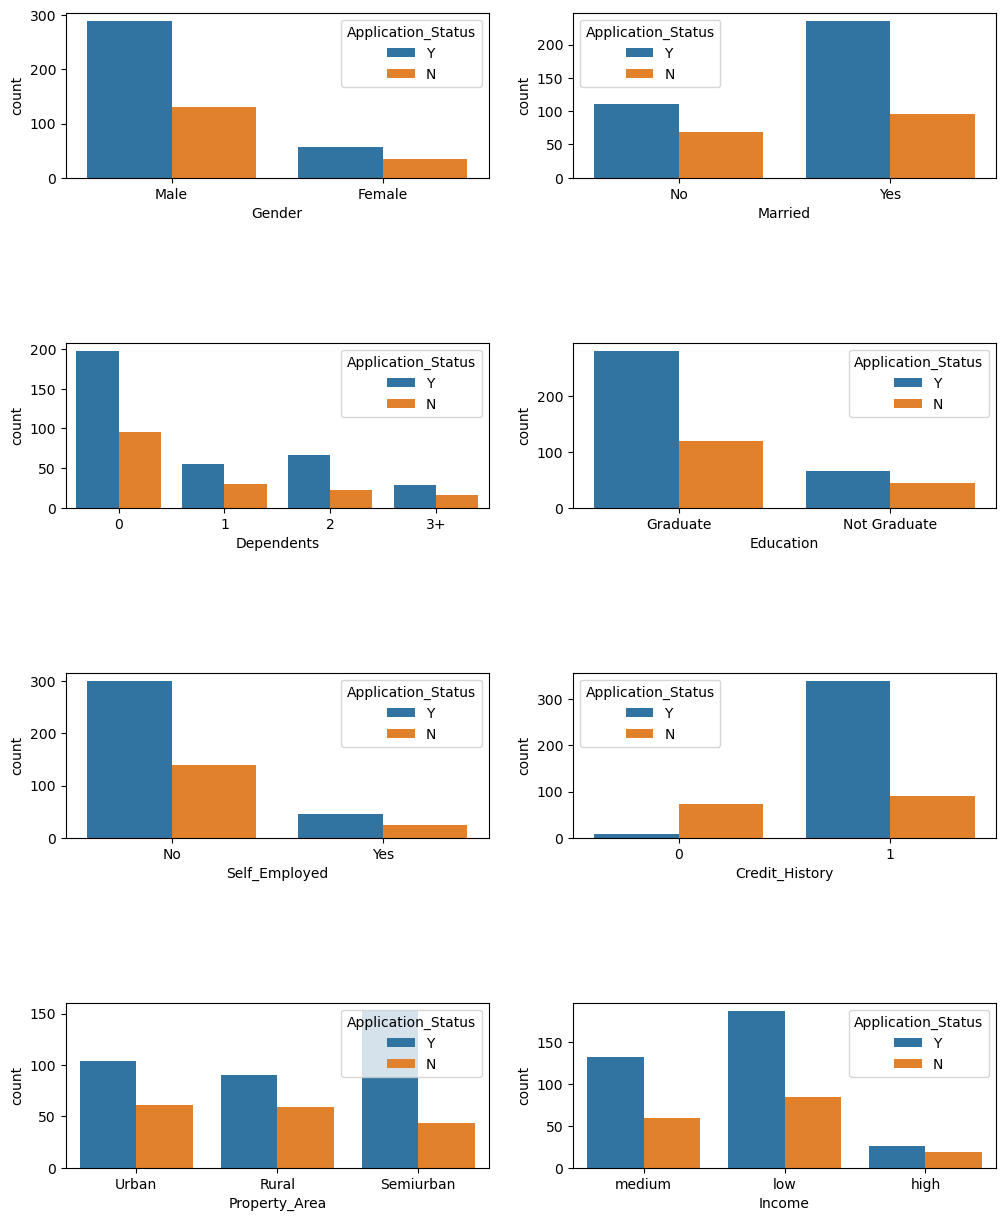

In [92]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_col):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df1,hue='Application_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [93]:
df1_encoded = pd.get_dummies(df1, drop_first=True)
df1_encoded.head()

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Income_low,Income_medium,Application_Status_Y
0,1,1,0,0,0,0,0,0,0,1,0,1,1
1,1,1,1,1,0,0,0,0,0,0,0,1,0
2,1,1,1,0,0,0,0,1,0,1,1,0,1
3,1,1,1,0,0,0,1,0,0,1,1,0,1
4,1,1,0,0,0,0,0,0,0,1,0,1,1


In [94]:
########## Split Features and Target Varible ############
X = df1_encoded.drop(columns='Application_Status_Y')
y = df1_encoded['Application_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

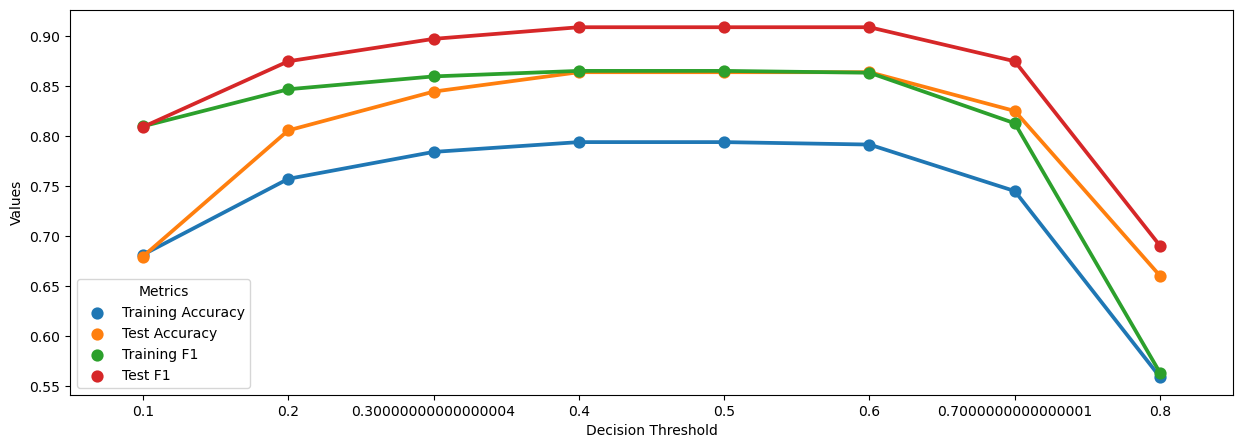

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)

    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)

Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)


In [96]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8640776699029126
Test F1 Score:  0.9090909090909091
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,19,14,33
1,0,70,70
All,19,84,103
